<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

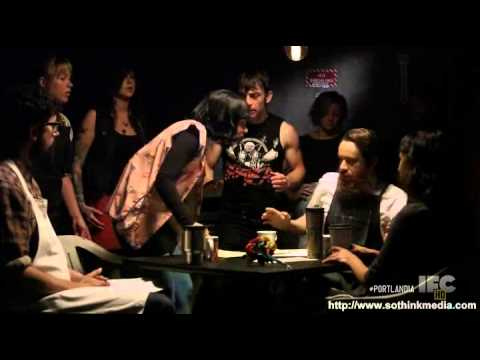

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [5]:
%pwd

'/mnt/c/Github/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [123]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head(10)

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating


In [124]:
# Start here 
# lambda x : :4 something like that, exclude lower start tatings.

# Imports
from collections import Counter
import re
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer


# Cleaning
import string
print(shops['full_review_text'])

0        11/25/2016 1 check-in Love love loved the atm...
1        12/2/2016 Listed in Date Night: Austin, Ambia...
2        11/30/2016 1 check-in Listed in Brunch Spots ...
3        11/25/2016 Very cool decor! Good drinks Nice ...
4        12/3/2016 1 check-in They are located within ...
                              ...                        
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, Length: 7616, dtype: object


In [125]:
# Cleaning dates and "check-ins" from full_review_text
for i in shops['full_review_text']:
    shops['full_review_text'] = shops['full_review_text'].str.lstrip('0123456789/ ').str.lstrip('check-ins ')

In [126]:
print(shops['full_review_text'])

0       Love love loved the atmosphere! Every corner o...
1       Listed in Date Night: Austin, Ambiance in Aust...
2       Listed in Brunch Spots I loved the eclectic an...
3       Very cool decor! Good drinks Nice seating  How...
4       They are located within the Northcross mall sh...
                              ...                        
7611    I actually step into this restaurant by chance...
7612    Ok, The Steeping Room IS awesome. How do they ...
7613    Loved coming here for tea, and the atmosphere ...
7614    The food is just average. The booths didn't fe...
7615    I finally stopped in for lunch with my colleag...
Name: full_review_text, Length: 7616, dtype: object


In [128]:
# removing "start rating" from star_rating
shops['star_rating'] = shops['star_rating'].str.replace(' star rating', '')
print(shops['star_rating'])

0        5.0 
1        4.0 
2        4.0 
3        2.0 
4        4.0 
        ...  
7611     4.0 
7612     5.0 
7613     4.0 
7614     3.0 
7615     4.0 
Name: star_rating, Length: 7616, dtype: object


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [129]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [130]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [131]:
shops['tokens'].head()

0    [Love, love, loved, the, atmosphere!, Every, c...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [Listed, in, Brunch, Spots, I, loved, the, ecl...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [They, are, located, within, the, Northcross, ...
Name: tokens, dtype: object

In [109]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [132]:
wc = count(shops['tokens'])
wc.head(15)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
71,the,6520,27779,1.0,0.035250,0.035250,0.856092
3,and,6804,25748,2.0,0.032673,0.067923,0.893382
31,a,6181,22085,3.0,0.028025,0.095947,0.811581
69,I,5469,19780,4.0,0.025100,0.121047,0.718093
51,to,5631,16904,5.0,0.021450,0.142497,0.739364
24,,4343,14990,6.0,0.019021,0.161519,0.570247
37,of,5087,12495,7.0,0.015855,0.177374,0.667936
94,is,4955,11747,8.0,0.014906,0.192280,0.650604
46,was,3743,9539,9.0,0.012104,0.204385,0.491465
95,in,4429,8901,10.0,0.011295,0.215680,0.581539


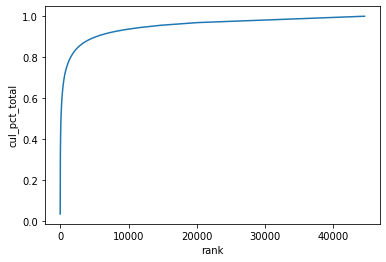

In [133]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

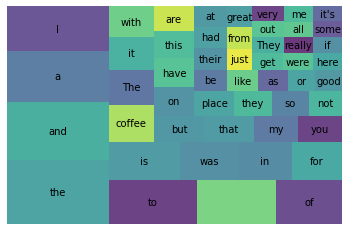

In [134]:
wc_top20 = wc[wc['rank'] <= 50]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [118]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [135]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops['tokens'].head()

0    [love, love, loved, atmosphere!, corner, coffe...
1    [listed, date, night:, austin,, ambiance, aust...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor!, good, drinks, nice, seating,  ,...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

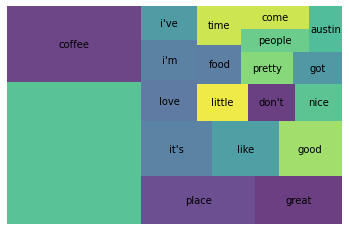

In [141]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [142]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [152]:
STOP_WORDS = nlp.Defaults.stop_words.union(["i've","i'm","it's","like","got","don't"," ","-"])

In [153]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [154]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
9,coffee,4207,8055,1.0,0.021434,0.021434,0.552390
84,place,3029,4264,2.0,0.011346,0.032780,0.397715
107,great,2439,3251,3.0,0.008651,0.041430,0.320247
161,good,2084,2779,4.0,0.007395,0.048825,0.273634
2,love,1434,1806,5.0,0.004806,0.053630,0.188288


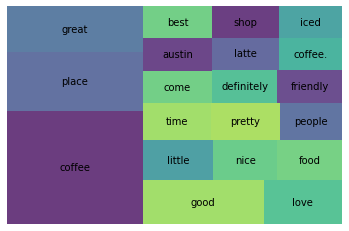

In [155]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [157]:
shops['star_rating'].value_counts()

 5.0     3780
 4.0     2360
 3.0      738
 2.0      460
 1.0      278
Name: star_rating, dtype: int64

In [158]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38887,delicious...and,1,1,38890.0,0.000003,0.999949,0.000131
38894,"(turkey,",1,1,38891.0,0.000003,0.999952,0.000131
38889,romaine,1,1,38892.0,0.000003,0.999955,0.000131
38891,"rib,",1,1,38893.0,0.000003,0.999957,0.000131
38890,"predictably,",1,1,38894.0,0.000003,0.999960,0.000131
38892,blts,1,1,38895.0,0.000003,0.999963,0.000131
38895,(+,1,1,38896.0,0.000003,0.999965,0.000131
38893,turkey),1,1,38897.0,0.000003,0.999968,0.000131
38896,(pork),1,1,38898.0,0.000003,0.999971,0.000131
38899,roomier,1,1,38899.0,0.000003,0.999973,0.000131


In [159]:
wc['appears_in_pct'].describe()

count    38909.000000
mean         0.001150
std          0.006743
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000394
max          0.552390
Name: appears_in_pct, dtype: float64

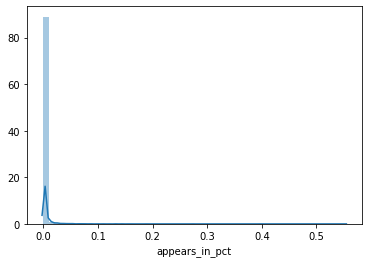

In [160]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

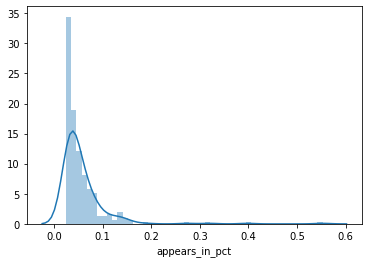

In [161]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct']);

In [162]:
wc.shape

(281, 7)

In [164]:
# Lemmatization
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [166]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)
shops['lemmas'].head()

0    [love, love, love, atmosphere, corner, coffee,...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [list, Brunch, Spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating,  ,  ...
4    [locate, Northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

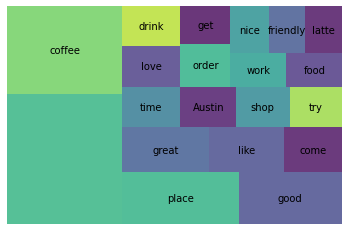

In [167]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

